In [1]:
# common packages 
import numpy as np 
import os
import copy
from math import *
from PIL import _imaging
import matplotlib.pyplot as plt
from functools import reduce
# reading in dicom files
import pydicom
# skimage image processing packages
from skimage import measure, morphology
from skimage.morphology import ball, binary_closing
from skimage.measure import label, regionprops
# scipy linear algebra functions 
from scipy.linalg import norm
import scipy.ndimage
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# plotly 3D interactive graphs 
import plotly
from plotly.graph_objs import *



Bad key "text.kerning_factor" on line 4 in
C:\Users\USER\Anaconda3.1\envs\gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Understanding the metadata in the provided dicom images
test_scan = pydicom.read_file('../train/ID00007637202177411956430/1.dcm')
test_scan

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'
(0008, 1090) Manufacturer's Model Name           LO: 'LightSpeed VCT'
(0010, 0010) Patient's Name                      PN: 'ID00007637202177411956430'
(0010, 0020) Patient ID                          LO: 'ID00007637202177411956430'
(0010, 0040) Patient's Sex                       CS: ''
(0012, 0063) De-identification Method            LO: 'Table;'
(0018, 0015) Body Part Examined                  CS: 'Chest'
(0018, 0050) Slice Thickness                     DS: "1.25"
(0018, 0060) KVP                                 DS: "120.0"
(0018, 1110) Distance Source to Detector         DS: "949.075012"
(0018, 1111) Distance

In [3]:
#Understanding the pixel data
rows = test_scan.Rows
columns = test_scan.Columns
pixel_spacing = test_scan.PixelSpacing
print("Rows: {rows} , Columns: {columns} and Pixel Spacing: {pixel_spacing}".format(rows=rows,columns=columns,pixel_spacing=pixel_spacing) )

Rows: 512 , Columns: 512 and Pixel Spacing: [0.652344, 0.652344]


In [4]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        MxN arrays are mapped to colors based on the `norm` (mapping
        scalar to scalar) and the `cmap` (mapping the normed scalar to
        a color).
    
        Elements of RGB and RGBA arrays represent pixels of an MxN image.
        All values should be in the 

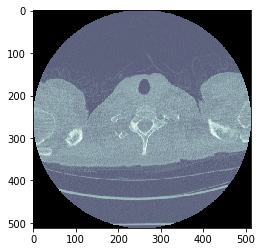

In [90]:
#Displaying Sample Image
plt.imshow(test_scan.pixel_array, cmap=plt.cm.bone)

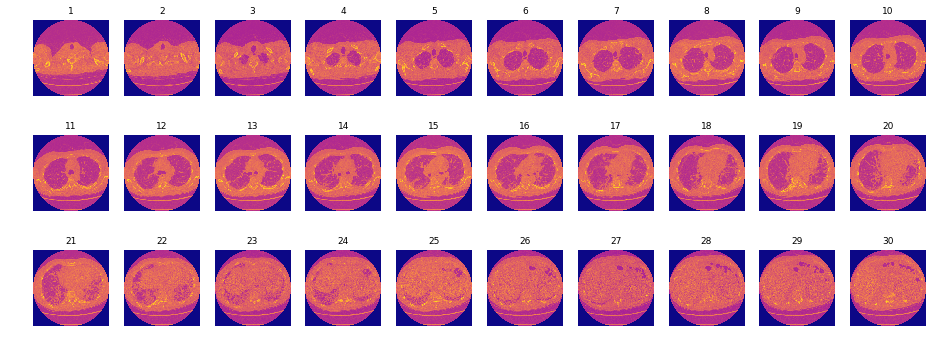

In [98]:
#reading all dicom files for a patient
def display_dcm(patient_dir):
    patient_dir = '../train/'+ patient_dir
    # First Order the files in the dataset
    files = []
    for dcm in list(os.listdir(patient_dir)):
        files.append(dcm) 
    files.sort(key=lambda f: int(re.sub('\D', '', f)))

    # Read in the Dataset
    for dcm in files:
        path = patient_dir + "/" + dcm
        datasets.append(pydicom.dcmread(path))

    # Plot the images
    fig=plt.figure(figsize=(16, 6))
    columns = 10
    rows = 3

    for i in range(1,columns*rows +1):
        img = datasets[i-1].pixel_array
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap="plasma")
        plt.title(i, fontsize = 9)
        plt.axis('off');
        
display_dcm("ID00007637202177411956430") 